# Esercitazione 9

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
import networkx as nx
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Problema del commesso viaggiatore

L'obiettivo dell'esercitazione è quello di creare un algoritmo genetico da utilizzare per trovare una possibile soluzione al problema del commesso viaggiatore: dato un insieme di punti bisogna trovare il percorso che tocchi tutti i punti, terminando al punto di partenza, che minimizzi la distanza percorsa (ovvero la funzione costo da ottimizzare è la lunghezza del cammino percorso).

### Esercizio 1

Scrivere un algoritmo genertico (GA) per studiare il problema del commesso viaggiatore. Includere i seguenti operatori:
* *mutazione genetica*
* *crossover genetico*


### Struttura dell'algoritmo

La **popolazione** è formata da P **individui**, ciascun individuo è caratterizzato da un proprio **DNA** che contiene in prdine le città visitate.
1. Inizialmente la popolazione viene creata assegnando a ciascun individuo un DNA casuale (ottenuto da permutazioni dell'ordine "originario" delle città
2. Ad ogni accoppiamento vengono selezionati due individui che com un metodo analogo a quello di *crossover genetico* ne generano uno nuovo.
3. A seguito della creazione del nuovo individuo possono avvenire, con una probabilità intorno al 10%.  
4. Il nuovo individuo sostituisce un individuo qualunque nella metà meno performante della popolazione.

**Popolazione** : è una classe che ha come elemento principale (datamembro privato) un vettore di individui. Contiene anche tutti i metodi che consentono alla popolazione di evolvere nel tempo.

**Individuo**: è una classe che ha come elemento principale (anche in questo caso un datamebmbro privato) un vettore di interi che costituisce il **DNA** dell'individuo.
Ad ogni città viene in origine assegnato un indice intero (da $0$ a $N$ dove $N+1$ è il numero delle città da visitare), nel DNA questi indici sono disposti casualmente (a seguito di alcune permutazioni). L'ordine in cui compaiono gli indici nel DNA indica l'ordine con cui sono visitate le diverse città.

La *performance* di ciascun individuo viene valutata mediante una funzione costo (l'obiettivo è quello di trovare *un* minimo della funzione costo. In questo caso, il metodo della classe individuo che ne valuta la performance è stato denominato `GetFit()`.

**Scelta dei genitori**: La scelta dei genitori si basa su un algoritmo di selezione tra gli individui che seleziona l'individuo *j* secondo la legge *j*$=\lceil{M\times r^p}\rceil-1$ con $M$ numero degli individui, $r$ numero estratto casualmente da una distribuzione uniforme; l'espoenente $p$ rappresenta la *selettività* dell'algoritmo.

**Selettività**: è un parametro che definisce quanto *sia importante la performance* dell'individuo nella scelta dei genitori. Quando $p=1$ è tutti gli individui hanno la stessa probabilità di essere selezionati come genitori mentre quando $p>1$ la probabilità di diventare genitori è maggiore per gli individui più performati. Tanto è maggiore $p$ tanto più l'algoritmo sarà sbilanciato a favore degli individui più performanti. 

**Mutabilità**: questo parametro controlla la probabilità che alla nascita di un individuo questo subisca una mutazione. Le mutazioni possibili sono elencate di seguito.

**Mutazioni**: le possibili mutazioni implementate nell'algoritmo sono le seguenti:
1. Permutazione di un coppia di città (permutazione di due geni del DNA)
2. *Shift* di *+n* posizioni di *m* città (geni) del DNA
3. Permutazione di *m* città tra due gruppi vicini
4. Inversione dell'ordine con cui un set di città (geni) appare all'interno del DNA

### Esercizio 2

In questo esercizio il codice implementato al punto precedente viene applicato a due problemi di ottimizzazione.
Per entrambi gli esercizi il numero di città da visitare è $N=34$, è stata scelta una popolazione di $M=400$ individui tra i quali avvengono 100 accoppiamenti. La simulazione è durata per $10^3$ generazioni.
Sono stati poii utilizzati una selettività $p=1.5$ e una mutabilità $m = 0.15$.

#### Parte 1 - 34 città disposte in maniera casuale su una circonferenza

Per prima cosa sono state distribuite le 34 città su una circonferenza di raggio unitario. Dopo di che è stata fatta la ricerca del percorso *migliore* con gli algoritmi genetici.

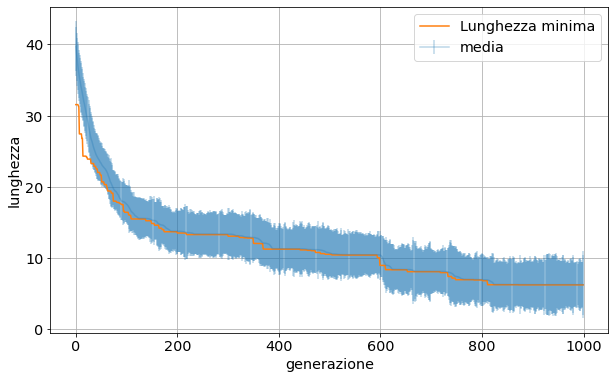

In [2]:
best, media, sigma = np.loadtxt("StatCRF.dat", usecols=(0,1,2), unpack='true')
x = np.arange(len(media))

plt.errorbar(x, media,yerr=sigma, label="media", alpha=0.3)
plt.plot(x,best,label="Lunghezza minima")
plt.xlabel('generazione')
plt.ylabel('lunghezza')
plt.grid(True)
plt.legend()
plt.show()

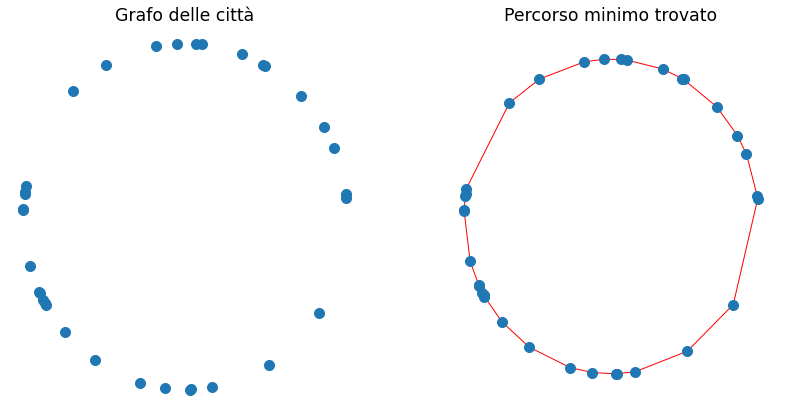

<Figure size 360x360 with 0 Axes>

In [3]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open ('map_CRF.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");

#Plotto il miglior percorso trovato
file = open ('path_CRF.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

In questo caso è evidente che la soluzione trovata dall'algoritmo è effettivamente la soluzione ottima. Sappiamo infatti che il percorso più veloce che tocca tutti i punti distribuiti su una circonferenza è quello che percorre la circonferenza. In via del tutto generale non è detto però che questo tipo di algoritmo trovi la soluzione *migliore* in senso assoluto, sicuramente trova la migliore soluzione tra le migliori.

#### Parte 2 - 34 città disposte in maniera casuale all'interno di una superficie quadrata

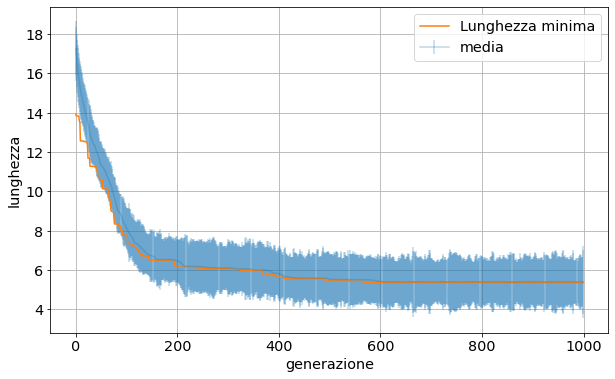

In [4]:
best, media, sigma = np.loadtxt("StatSQ.dat", usecols=(0,1,2), unpack='true')
x = np.arange(len(media))

plt.errorbar(x, media,yerr=sigma, label="media", alpha=0.3)
plt.plot(x,best,label="Lunghezza minima")
plt.xlabel('generazione')
plt.ylabel('lunghezza')
plt.grid(True)
plt.legend()
plt.show()

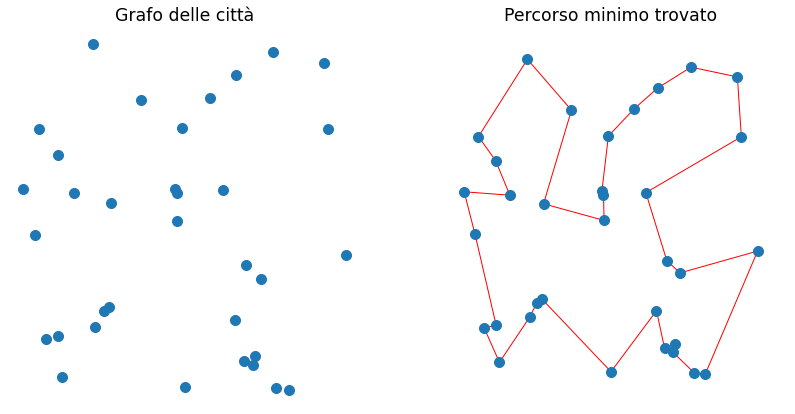

<Figure size 360x360 with 0 Axes>

In [5]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

#Plotto la posizione delle città
file = open ('map_SQ.dat', 'r')
mappa = []
mappa = [line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");

#Plotto il miglior percorso trovato
file = open ('path_SQ.dat','r')
path = []
path = [line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

In questo caso non si può affermare con certezza che quesa sia la soluzione migliore, resta comunque una candidata soluzione ottima, infatti non presenta evidenze di non-ottimalità (eg. incroci)